# Clustering Tracks

## Processing Data
* Cleaning data
* Split training set and testing set
* Scaling data

In [25]:
# Import libraries and dependencies
import pandas as pd
import hvplot.pandas
from pathlib import Path


In [26]:
# Read the csv file into a pandas DataFrame
tracks_features_df = pd.read_csv(Path("Resources/tracks_feature.csv"))

# Review the DataFrame
tracks_features_df.head()

,track_uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,spotify:track:6KaZC1JpPRq9CNZ3X8jBCM,0.591,0.721,2,-7.960,1,0.0308,0.01970,0.000244,0.1170,0.434,94.053,246933,4
1,spotify:track:7hiqCnFcOBFAqZSf3AOY8a,0.399,0.955,11,-3.662,0,0.0822,0.00260,0.376000,0.4250,0.679,156.583,165549,4
2,spotify:track:1SxVwlqUaz6PdQSqjclahn,0.573,0.915,1,-3.658,1,0.0532,0.80900,0.304000,0.3240,0.758,105.323,230000,4
3,spotify:track:1XGX6lvmT464sVpJKTF3aV,0.492,0.801,2,-7.679,1,0.0357,0.00896,0.000120,0.1870,0.491,74.969,229600,4
4,spotify:track:317d1IqYa8JhV8BGVDtgwZ,0.219,0.367,0,-9.696,0,0.0285,0.07260,0.000006,0.0832,0.107,148.622,274547,4


## Scaling

In [27]:
# Import libraries and dependencies
from sklearn.preprocessing import StandardScaler

In [28]:
# Creating `scaler` 
scaler = StandardScaler()
# Scale the `tracks_features_df` and drop the 'track_uri' column
scaler.fit(tracks_features_df.drop('track_uri',axis=1))
scaled_tracks = scaler.transform(tracks_features_df.drop('track_uri',axis=1))

In [29]:
# Create `scaled_tracks_df` for the scaled_tracks
scaled_tracks_df = pd.DataFrame(scaled_tracks,columns=tracks_features_df.drop('track_uri',axis=1).columns, index=tracks_features_df.index)
# Check out `scaled_tracks_df`
scaled_tracks_df


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.219920,0.511650,-0.916348,0.302226,0.725791,-0.507261,-0.945325,-0.631304,-0.485287,-0.154460,-0.866982,-0.003276,0.254497
1,-0.820554,1.391278,1.612534,1.066076,-1.377808,-0.060998,-0.993576,0.444108,1.137242,0.753029,1.223033,-0.523731,0.254497
2,0.122375,1.240915,-1.197335,1.066787,0.725791,-0.312781,1.281859,0.238045,0.605179,1.045648,-0.490291,-0.111564,0.254497
3,-0.316574,0.812378,-0.916348,0.352166,0.725791,-0.464718,-0.975630,-0.631659,-0.116530,0.056670,-1.504849,-0.114122,0.254497
4,-1.795998,-0.819069,-1.478322,-0.006299,-1.377808,-0.527230,-0.796056,-0.631987,-0.663344,-1.365681,0.956943,0.173316,0.254497
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214987,-0.159420,-0.533378,0.488586,0.201280,-1.377808,-0.245060,1.183098,-0.631424,-0.912518,-0.021115,0.342606,-0.032233,0.254497
2214988,0.447523,1.346169,-1.197335,1.279876,0.725791,0.310598,-0.945889,-0.628969,-0.776604,1.708671,0.085307,-0.273569,0.254497
2214989,0.030250,0.492855,0.207599,-0.136925,-1.377808,-0.017587,-1.000506,-0.631978,0.657858,1.023424,0.923151,-0.145074,0.254497
2214990,-1.682196,-1.059651,-0.916348,-0.704747,0.725791,-0.519416,1.081517,0.713136,-0.559038,-1.457171,-0.688096,-0.624529,0.254497


## Finding K Value
* Elbow Method vs. Silhouette Score

In [30]:
# Import libraries and dependencies
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import hvplot.pandas
import time

In [ ]:
# Set up the KMeans model where k is the number for clusters ranging from 1 to 10
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(scaled_tracks_df)
                for k in range(1, 10)]
# Create comprehensive list for inertias
inertias = [model.inertia_ for model in kmeans_per_k]
# Create comprehensive list for silhouette scores
silhouette_scores = [silhouette_score(scaled_tracks_df, model.labels_)
                     for model in kmeans_per_k[1:]]

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Create elbow_df and sil_score_df
elbow_df = pd.DataFrame({
    "k": k,
    "inertia": inertias
})
sil_score_df = pd.DataFrame({
    "k": k,
    "Silhouette_Scores": silhouette_scores
}) 

In [ ]:
# Plot elbow curve
elbow_df.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [ ]:
# Plot silhouette score line
sil_score_df.hvplot.line(
    x="k", 
    y="silhouette_score", 
    title="Silhouette Score", 
    xticks=k
)

In [ ]:
# # Alternative ways to visualize the curves
# plt.figure(figsize=(8, 3.5))
# plt.plot(range(1, 10), inertias, "bo-")
# plt.xlabel("k")
# plt.ylabel("Inertia")
# # plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
# #              arrowprops=dict(facecolor='black', shrink=0.1))
# # plt.text(4.5, 650, "Elbow", horizontalalignment="center")
# plt.axis([1, 8.5, 0, 1300])
# plt.grid()
# save_fig("inertia_vs_k_plot")
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 3))
# plt.plot(range(2, 10), silhouette_scores, "bo-")
# plt.xlabel("$k$")
# plt.ylabel("Silhouette score")
# plt.axis([1.8, 8.5, 0.55, 0.7])
# plt.grid()
# save_fig("silhouette_score_vs_k_plot")
# plt.show()

## Clustering 

In [100]:
# Initialize the K-Means model with n_clusters=8
model = KMeans(n_clusters=8)

# Fit the model for the scaled_tracks_df 
model.fit(scaled_tracks_df)

# Predict the clusters of tracks
tracks_clusters = model.predict(scaled_tracks_df)

# View the tracks clusters
print(tracks_clusters)

/Users/jiajialiu/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 1 1 0]


In [101]:
# Create a copy of the scaled_tracks_df
clustered_scaled_tracks_df = scaled_tracks_df.copy()

# Create a new column "track_cluster" for the predicted clusters
clustered_scaled_tracks_df["track_cluster"] = tracks_clusters

# Review the DataFrame
clustered_scaled_tracks_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_uri,songs_cluster
0,0.171147,0.022968,-1.197335,-0.016074,-1.377808,-0.461246,1.180277,1.554564,-0.448411,0.264096,0.838354,-0.079588,0.254497,spotify:track:2scVgQKMFnsHgj5ThLlW0j,0
1,0.149471,1.297301,0.488586,-0.045043,0.725791,-0.367478,-1.000362,1.895141,-0.569574,-1.399388,0.602045,0.948485,0.254497,spotify:track:4mdMLQVgaleASbJSpmhQkJ,0
2,-0.170258,0.553000,1.331547,0.457556,0.725791,-0.377897,-0.707454,-0.631992,0.178475,1.760528,2.342476,-0.348225,0.254497,spotify:track:0210qTsUZo7WghrDKEZ9d2,0
3,0.593840,0.887560,1.331547,0.866494,-1.377808,-0.482083,-0.998999,-0.631947,-0.684415,0.482634,-0.667306,-0.291392,0.254497,spotify:track:0XTSTgamPnRIg6hgpp81po,0
4,0.496295,-0.431882,-0.073387,0.138011,0.725791,-0.528098,0.359156,0.635862,-0.598021,-0.461896,-0.637692,0.178343,0.254497,spotify:track:6d2kJRcdqR2D1O8IES2WNE,0


## Visualization Of Clustering

In [103]:
# Import libraries and dependencies
from sklearn.manifold import TSNE
import seaborn as sns

In [104]:
# Create a copy of `clustered_scaled_tracks_df`
visual_cluster_df = clustered_scaled_tracks_df.copy()

In [105]:
# Create a TSNE model
m = TSNE(learning_rate=50)

In [ ]:
# Fit the data
tsne_features = m.fit_transform(scaled_tracks_df)

In [52]:
# Check out the first 3 rows of the coordinates of the data
tsne_features[1:4,:]

array([[  2.9503899,  28.305866 ],
       [-19.777706 , -27.539    ],
       [  9.205538 ,  28.934254 ]], dtype=float32)

In [53]:
# Create the X and y for the data
visual_cluster_df["X"] = tsne_features[:,0]
visual_cluster_df["y"] = tsne_features[:,1]

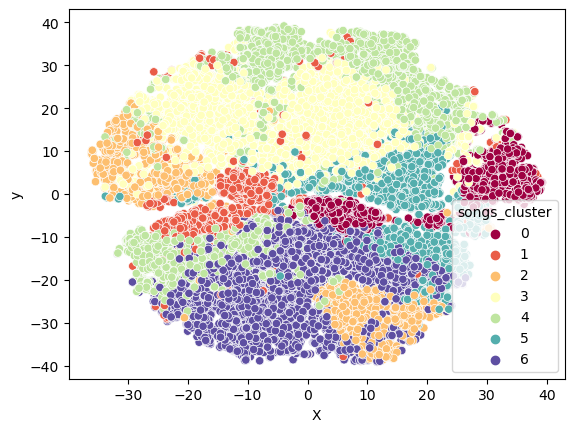

In [55]:
# Plot the clustering result
sns.scatterplot(x="X", y="y", hue='track_cluster', palette='Spectral', data=visual_cluster_df)
plt.show()

## Clustering Input Playlist

In [ ]:
# Process the input playlist data
scaled_input_playlist_df = pd.DataFrame(data={
    'danceability':0.07272,
    'energy':-0.21237,
    'key':-0.103686,
    'loudness':0.274964,
    'mode':0.876177,
    'speechiness':0.152517,
    'acousticness':-0.31441,
    'instrumentalness':-0.377864,
    'liveness':-0.536152,
    'valence':0.210339,
    'tempo':0.465768,
    'duration_ms_y':-0.290816,
    'time_signature':0.582697
},index=[0])
# Check out the dataframe
scaled_input_playlist_df

In [ ]:
# Cluster the new input playlist
input_playlist_cluster = model.predict(scaled_input_playlist_df)
input_playlist_cluster[0]

## Recommend User's Song

In [ ]:
# Label the tracks in `tracks_features_df`
tracks_features_df["cluster"]=clustered_scaled_tracks_df["track_cluster"]
# Get all the tracks of the wanted cluster
recommend_tracks_df = tracks_features_df[tracks_features_df["cluster"]==input_playlist_cluster[0]]
recommend_tracks_df

## Save The Model

In [ ]:
import pickle

In [ ]:
# save the song classification model as a pickle file
model_pkl_file = "song_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# save the nearest neighbor model as a pickle file
neigh_pkl_file = "song_neighbor.pkl"  

with open(neigh_pkl_file, 'wb') as file:  
    pickle.dump(neigh, file)
